In [1]:
import os, csv, re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
base3_wp = pd.read_csv('../../third/topics/bagfile-_base_waypoints.csv')
base3_xs = []
base3_ys = []
base_waypoints3 = dict()
for idx, item in base3_wp.iteritems():
    if "position" in idx:
        waypoint_idx = idx.split(".")[1]
        result = re.search("\d+", waypoint_idx)
        idx_key = int(result.group())
        if idx_key not in base_waypoints3:
            base_waypoints3[idx_key] = dict()
        
        base_waypoints3[idx_key][idx[-1]] = item.values[0]
        
for idx, wp in base_waypoints3.iteritems():
    base3_xs.append(wp['x'])
    base3_ys.append(wp['y'])
    
len(base3_xs)

88

In [74]:
base4_wp = pd.read_csv('../../fourth/base_waypoints.csv')
base4_xs = []
base4_ys = []
base4_zs = []
base4_orient_xs = []
base4_orient_ys = []
base4_orient_zs = []
base4_orient_ws = []

base_waypoints4 = dict()
for idx, item in base4_wp.iteritems():
    if "position" in idx or "orientation" in idx:
        waypoint_idx = idx.split(".")[1]
        result = re.search("\d+", waypoint_idx)
        idx_key = int(result.group())
        
        if idx_key not in base_waypoints4:
            base_waypoints4[idx_key] = dict()
        idx_prefix = idx.split('.')[-2] # position or orientation
        base_waypoints4[idx_key]["{}_{}".format(idx_prefix,idx[-1])] = item.values[0]
        
for idx, wp in base_waypoints4.iteritems():
    base4_xs.append(wp['position_x'])
    base4_ys.append(wp['position_y'])
    base4_zs.append(wp['position_z'])
#     base4_yaws.append(wp['yaw'])
    
len(base4_xs)

88

In [75]:
fieldnames = ['x', 'y', 'z', 'yaw']
base_waypoints_data = list()

for idx, wp in base_waypoints4.iteritems():
    euler = tf.transformations.euler_from_quaternion([wp['orientation_x'], wp['orientation_z], 
                                                      wp['orientation_x'], wp['orientation_x']])
    yaw_waypoint_r.append(euler[2])
    
    base_waypoints_data.append({'x': float(wp['position_x']), 'y': float(wp['position_y']), 'z': float(wp['position_z']), 
                               'yaw': float(euler[2])})

with open('../data/base_waypoints_site.csv', 'w') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(base_waypoints_data)    

[12.1159,
 10.970800000000001,
 9.8253000000000004,
 8.7088999999999999,
 7.4809999999999999,
 6.2141000000000002,
 5.2122000000000002,
 4.242,
 3.2563,
 2.3027000000000002,
 1.3117000000000001,
 0.30380000000000001,
 -0.64159999999999995,
 -1.5375000000000001,
 -2.6953,
 -3.7069999999999999,
 -4.6875,
 -5.5994000000000002,
 -6.4020000000000001,
 -6.9396000000000004,
 -7.3224999999999998,
 -7.3490000000000002,
 -7.5660999999999996,
 -7.2207999999999997,
 -6.7092999999999998,
 -5.8918999999999997,
 -4.9577,
 -4.0411000000000001,
 -2.9346000000000001,
 -1.8694,
 -0.64980000000000004,
 0.52849999999999997,
 1.5222,
 2.8081,
 3.8576000000000001,
 4.9642999999999997,
 6.0978000000000003,
 7.1955999999999998,
 8.3112999999999992,
 9.4610000000000003,
 10.555899999999999,
 11.710000000000001,
 12.8574,
 13.951599999999999,
 15.0587,
 16.1904,
 17.302600000000002,
 18.351299999999998,
 19.381499999999999,
 20.316800000000001,
 21.222100000000001,
 22.022400000000001,
 22.893799999999999,
 23.7

In [22]:
test_final_waypoints = list()
with open('../ros/src/dashboard/final_waypoints_test.csv', 'rb') as f:
    reader = csv.DictReader(f, ['id', 'pos_x', 'pos_y', 'pos_z', 'orient_x', 'orient_y', 'orient_z', 'orient_w'])
    for idx, wp in enumerate(reader):
        if idx == 0:
            continue
        test_final_waypoints.append(wp)

In [23]:
final_waypoints = list()
with open('../ros/src/dashboard/final_waypoints.csv', 'rb') as f:
    reader = csv.DictReader(f, ['id', 'pos_x', 'pos_y', 'pos_z', 'orient_x', 'orient_y', 'orient_z', 'orient_w'])
    for idx, wp in enumerate(reader):
        if idx == 0:
            continue
        final_waypoints.append(wp)

In [24]:
final_waypoints[0]

{'id': '0_0',
 'orient_w': '0.43126674140204313',
 'orient_x': '0.0',
 'orient_y': '0.0',
 'orient_z': '-0.9022244719361492',
 'pos_x': '1.3549',
 'pos_y': '10.8159',
 'pos_z': '0.3129'}

In [26]:
test_final_waypoints[0]

{'id': '0_0',
 'orient_w': '0.43126674140204313',
 'orient_x': '0.0',
 'orient_y': '0.0',
 'orient_z': '-0.9022244719361492',
 'pos_x': '1.3549',
 'pos_y': '10.8159',
 'pos_z': '0.3129'}

In [30]:
xs = []
ys = []
ox, oy, oz, ow = [], [], [], []
for wp in final_waypoints:
    xs.append(wp['pos_x'])
    ys.append(wp['pos_y'])
    ox.append(wp['orient_x'])
    oy.append(wp['orient_y'])
    oz.append(wp['orient_z'])
    ow.append(wp['orient_w'])
#     if int(wp['id'].split('_')[0]) == 1:
#         print wp['id']
#         break

len(xs)

4120

In [28]:
test_xs = []
test_ys = []
test_ox, test_oy, test_oz, test_ow = [], [], [], []
for wp in test_final_waypoints:
    test_xs.append(wp['pos_x'])
    test_ys.append(wp['pos_y'])
    test_ox.append(wp['orient_x'])
    test_oy.append(wp['orient_y'])
    test_oz.append(wp['orient_z'])
    test_ow.append(wp['orient_w'])
#     if int(wp['id'].split('_')[0]) == 3:
#         print wp['id']
#         break
        
len(test_xs)

2400

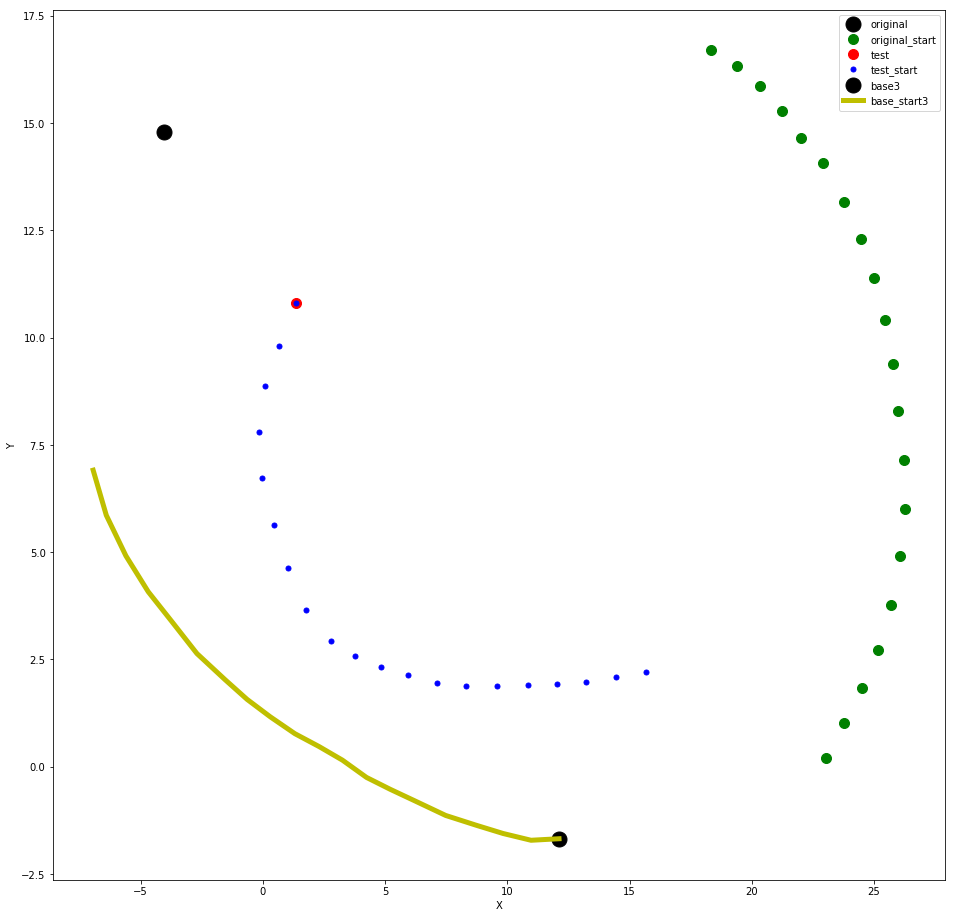

In [21]:
plt.rcParams["figure.figsize"] = [16, 16]
p1 = plt.plot([xs[0]], [ys[0]], 'ko', ms=15.0)
p2 = plt.plot(xs[20:40], ys[20:40], 'go', ms=10.0)
p3 = plt.plot([test_xs[0]], [test_ys[0]], 'ro', ms=10.0)
p4 = plt.plot(test_xs[20:40], test_ys[20:40], 'bo', ms=5.0)
p5 = plt.plot([base3_xs[0]], [base3_ys[0]], 'ko', ms=15.0)
p6 = plt.plot(base3_xs[:20], base3_ys[:20], 'y', lw=5.0)
# p7 = plt.plot([base4_xs[0]], [base4_ys[0]], 'ro', ms=10.0)
# p8 = plt.plot(base4_xs, base4_ys, 'g', lw=3.0)
plt.xlabel("X", fontsize=10)
plt.ylabel("Y", fontsize=10)
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), 
           ('original', 'original_start', 'test', 'test_start', 'base3', 'base_start3', 'base4', 'base_start4'), loc=0)
plt.show()

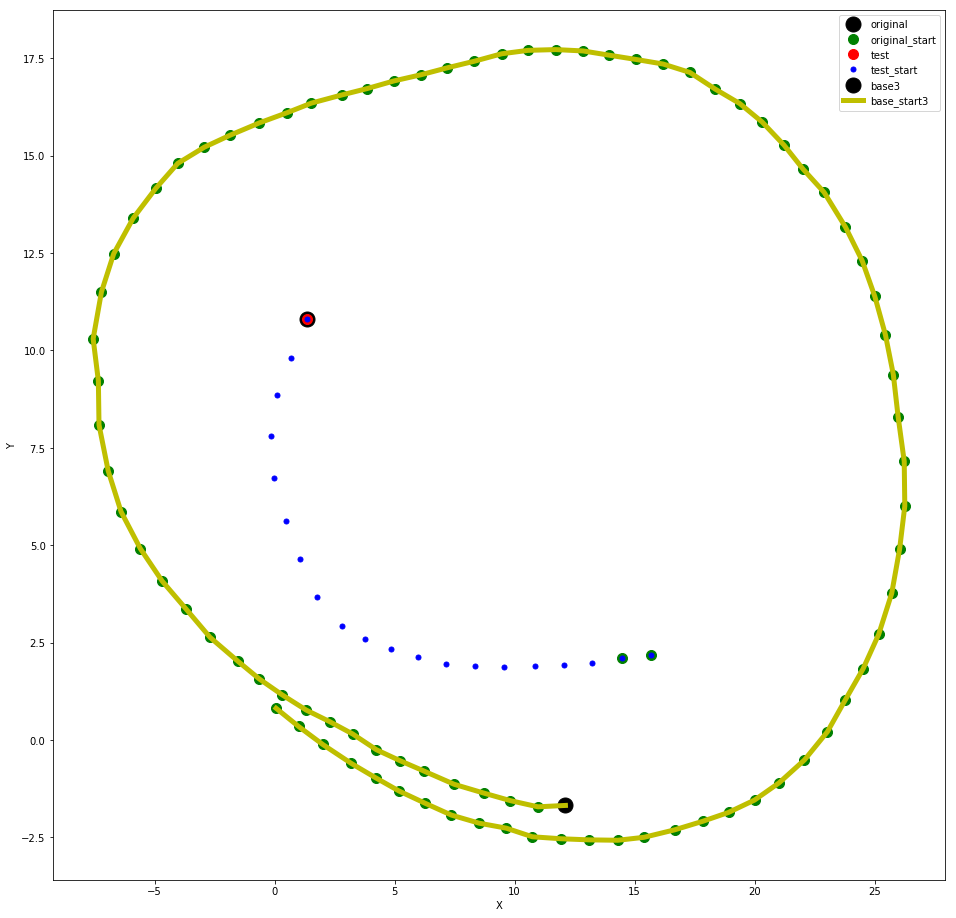

In [70]:
plt.rcParams["figure.figsize"] = [16, 16]
p1 = plt.plot([xs[0]], [ys[0]], 'ko', ms=15.0)
p2 = plt.plot(xs[-330:-240], ys[-330:-240], 'go', ms=10.0)
p3 = plt.plot([test_xs[0]], [test_ys[0]], 'ro', ms=10.0)
p4 = plt.plot(test_xs[:20], test_ys[:20], 'bo', ms=5.0)
p5 = plt.plot([base3_xs[0]], [base3_ys[0]], 'ko', ms=15.0)
p6 = plt.plot(base3_xs, base3_ys, 'y', lw=5.0)
# p7 = plt.plot([base4_xs[0]], [base4_ys[0]], 'ro', ms=10.0)
# p8 = plt.plot(base4_xs, base4_ys, 'g', lw=3.0)
plt.xlabel("X", fontsize=10)
plt.ylabel("Y", fontsize=10)
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), 
           ('original', 'original_start', 'test', 'test_start', 'base3', 'base_start3', 'base4', 'base_start4'), loc=0)
plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = [16, 16]
p1 = plt.plot(range(len(ow)), ow, 'kx', ms=3.0)
p2 = plt.plot(range(len(test_ow)), test_ow, 'go', ms=3.0)
plt.xlabel("X", fontsize=10)
plt.ylabel("Y", fontsize=10)
plt.legend((p1[0], p2[0]), ('ox', 'test_ox'), loc=0)
plt.show()